In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 


In [3]:
chile_df = pd.read_csv('data_clean/chile_clean.csv')
argentina_df = pd.read_csv('data_clean/argentina_clean.csv')
antartica_df = pd.read_csv('data_clean/antartica_clean.csv')

## ¿Cuáles son las especies fósiles más comunes en cada una de las tres regiones (Chile, Argentina y Antártida)?

### Chile


C:\Users\octah\AppData\Local\Temp\ipykernel_12816\1328225473.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_especies_chile.values, y=top_10_especies_chile.index, palette='viridis')


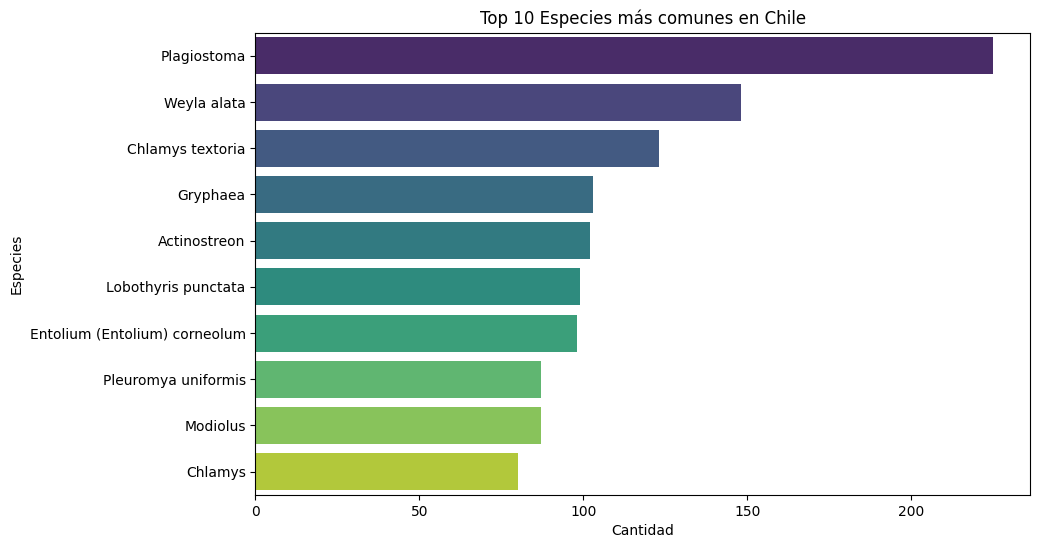

In [ ]:
#Hagamos un grafico con las top 10 especies mas comunes en cada region

top_10_especies_chile = chile_df['accepted_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_especies_chile.values, y=top_10_especies_chile.index, palette='viridis')
plt.title('Top 10 Especies más comunes en Chile')
plt.xlabel('Cantidad')
plt.ylabel('Especies')
plt.show()




### Argentina


C:\Users\octah\AppData\Local\Temp\ipykernel_12816\3176372099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_especies_argentina.values, y=top_10_especies_argentina.index, palette='viridis')


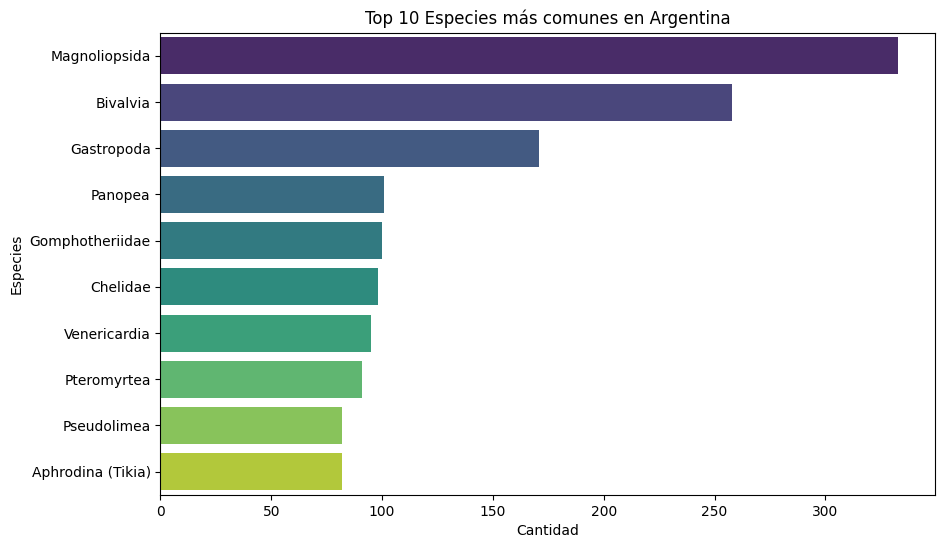

In [10]:
top_10_especies_argentina = argentina_df['accepted_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_especies_argentina.values, y=top_10_especies_argentina.index, palette='viridis')
plt.title('Top 10 Especies más comunes en Argentina')
plt.xlabel('Cantidad')
plt.ylabel('Especies')
plt.show()

### Antártida

C:\Users\octah\AppData\Local\Temp\ipykernel_12816\1893660038.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_especies_antartica.values, y=top_10_especies_antartica.index, palette='viridis')


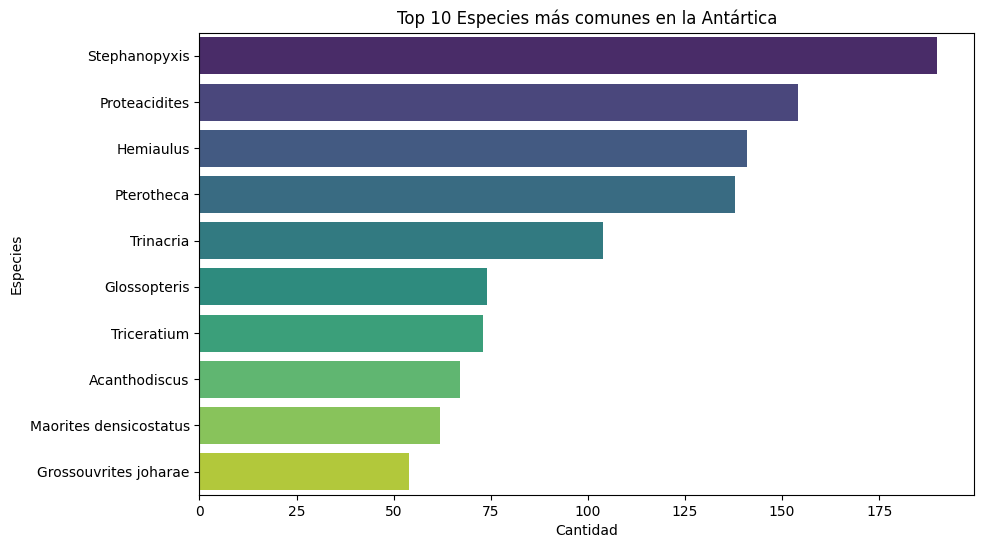

In [11]:
top_10_especies_antartica = antartica_df['accepted_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_especies_antartica.values, y=top_10_especies_antartica.index, palette='viridis')
plt.title('Top 10 Especies más comunes en la Antártica')
plt.xlabel('Cantidad')
plt.ylabel('Especies')
plt.show()

###  **Comparación de las especies fósiles más comunes entre regiones**

### **Enfoque del análisis**
Para identificar similitudes y diferencias entre las especies fósiles más comunes en Chile, Argentina y Antártida, realizaremos una comparación basada en sus características taxonómicas y ambientales.

### **Aspectos a comparar**
1. **Ambiente (`environment`)**:
   - Analizaremos en qué tipo de ambiente (acuático, terrestre, marino, etc.) se encuentran las especies más comunes en cada región.
   - Esto nos ayudará a entender la distribución ecológica y los hábitats predominantes en cada región.

2. **Familia (`family`)**:
   - Compararemos las familias a las que pertenecen las especies más comunes, para identificar si hay similitudes en términos de taxonomía general entre las regiones.

3. **Género (`genus`)**:
   - Evaluaremos si las especies más comunes pertenecen a géneros similares, lo que indicaría una conexión taxonómica más específica entre las regiones.
4. **Distribución por era (`era_early`)**:
   - Compararemos cómo se distribuyen las especies más comunes a lo largo de las eras geológicas, para identificar si hay eras dominantes en cada región.

---

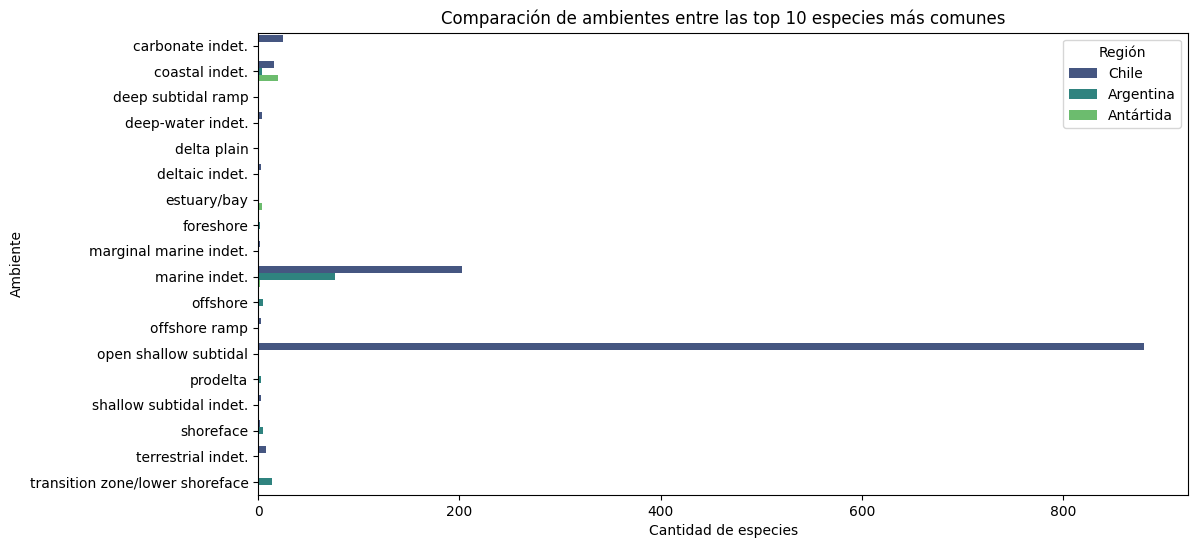

In [12]:
# Filtrar datos por las top 10 especies en cada región
top_especies_chile = chile_df[chile_df['accepted_name'].isin(top_10_especies_chile.index)]
top_especies_argentina = argentina_df[argentina_df['accepted_name'].isin(top_10_especies_chile.index)]
top_especies_antartica = antartica_df[antartica_df['accepted_name'].isin(top_10_especies_chile.index)]

# Comparar por environment
env_chile = top_especies_chile.groupby('environment')['accepted_name'].count()
env_argentina = top_especies_argentina.groupby('environment')['accepted_name'].count()
env_antartica = top_especies_antartica.groupby('environment')['accepted_name'].count()

# Crear un DataFrame para la comparación
df_env = pd.DataFrame({
    'Chile': env_chile,
    'Argentina': env_argentina,
    'Antártida': env_antartica
}).fillna(0)


# Graficar comparación con seaborn
plt.figure(figsize=(12, 6))
df_env_melted = df_env.reset_index().melt(id_vars='environment', var_name='Región', value_name='Cantidad')
sns.barplot(data=df_env_melted, x='Cantidad', y='environment', hue='Región', palette='viridis')
plt.title('Comparación de ambientes entre las top 10 especies más comunes')
plt.xlabel('Cantidad de especies')
plt.ylabel('Ambiente')
plt.legend(title='Región')
plt.show()

In [18]:
env_argentina

environment
coastal indet.                      4
deep subtidal ramp                  1
foreshore                           2
marine indet.                      76
offshore                            5
prodelta                            3
shoreface                           5
transition zone/lower shoreface    14
Name: accepted_name, dtype: int64

In [17]:
env_chile

environment
carbonate indet.            25
coastal indet.              16
deep-water indet.            4
deltaic indet.               3
marginal marine indet.       2
marine indet.              203
offshore                     1
offshore ramp                3
open shallow subtidal      880
shallow subtidal indet.      3
shoreface                    2
terrestrial indet.           8
Name: accepted_name, dtype: int64

### Observaciones

- Chile presenta una **clara dominancia** del ambiente **"open shallow subtidal"** en las especies fósiles más comunes, con una cantidad significativamente mayor de registros en comparación con cualquier otro ambiente.
- Esto sugiere que los ecosistemas fósiles en Chile estuvieron altamente influenciados por **ambientes marinos someros** cercanos a la costa.

#### **Comparación con otras regiones**
- **Argentina**: Los ambientes están más distribuidos, sin una dominancia marcada como en Chile. Esto refleja una mayor diversidad de ecosistemas.
- **Antártida**: Presenta una menor cantidad de registros totales, con especies distribuidas en varios ambientes sin un claro predominio.

#### **Conclusión**
- La dominancia del ambiente **"open shallow subtidal"** en Chile puede indicar que esta región tuvo ecosistemas marinos someros particularmente ricos en biodiversidad durante los períodos fósiles analizados.
- Esto resalta la importancia de los ambientes marinos poco profundos en la estructura ecológica y la preservación de fósiles en esta región.


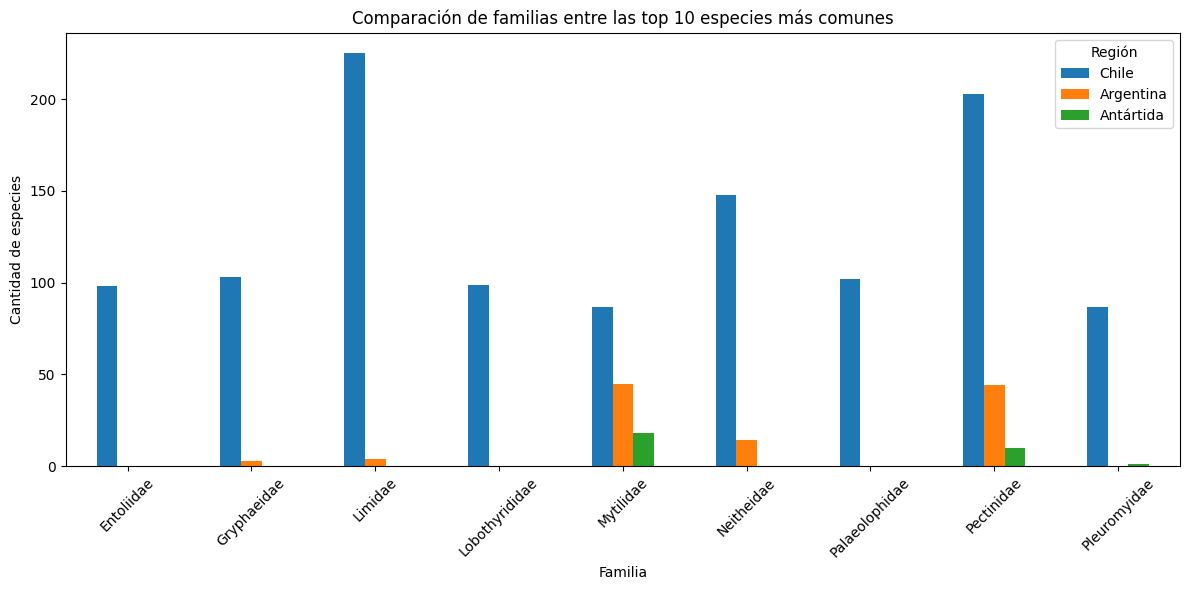

In [ ]:
# Comparar por familia
family_chile = top_especies_chile.groupby('family')['accepted_name'].count()
family_argentina = top_especies_argentina.groupby('family')['accepted_name'].count()
family_antartica = top_especies_antartica.groupby('family')['accepted_name'].count()

# Crear un DataFrame para la comparación
df_family = pd.DataFrame({
    'Chile': family_chile,
    'Argentina': family_argentina,
    'Antártida': family_antartica
}).fillna(0)

# Graficar comparación
df_family.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de familias entre las top 10 especies más comunes')
plt.xlabel('Familia')
plt.ylabel('Cantidad de especies')
plt.legend(title='Región')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


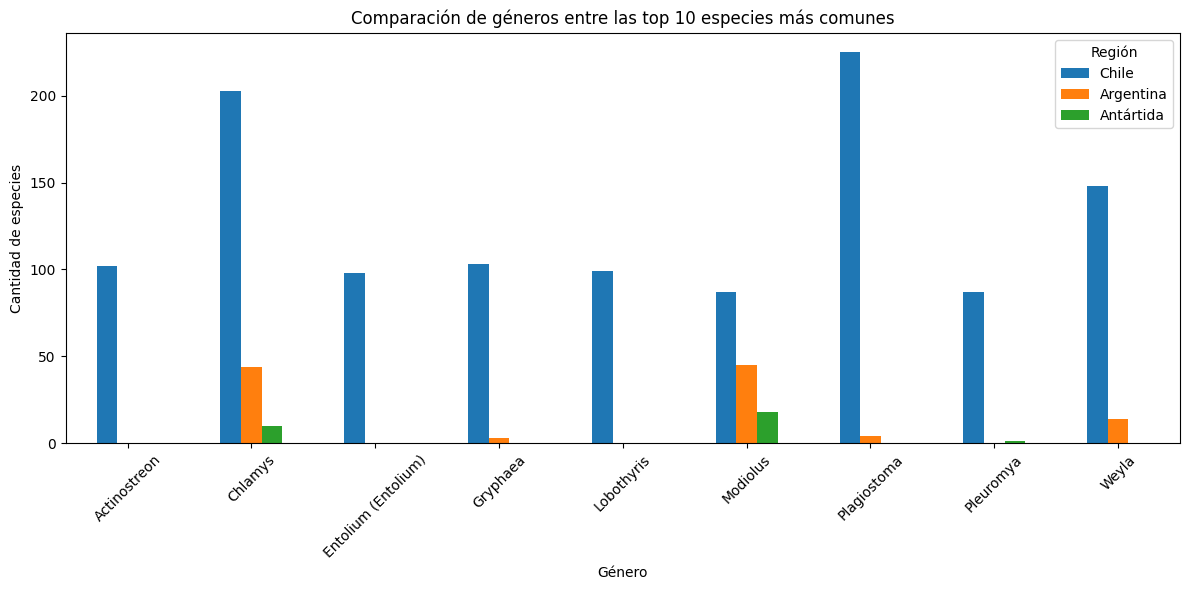

In [9]:
# Comparar por género
genus_chile = top_especies_chile.groupby('genus')['accepted_name'].count()
genus_argentina = top_especies_argentina.groupby('genus')['accepted_name'].count()
genus_antartica = top_especies_antartica.groupby('genus')['accepted_name'].count()

# Crear un DataFrame para la comparación
df_genus = pd.DataFrame({
    'Chile': genus_chile,
    'Argentina': genus_argentina,
    'Antártida': genus_antartica
}).fillna(0)

# Graficar comparación
df_genus.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de géneros entre las top 10 especies más comunes')
plt.xlabel('Género')
plt.ylabel('Cantidad de especies')
plt.legend(title='Región')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

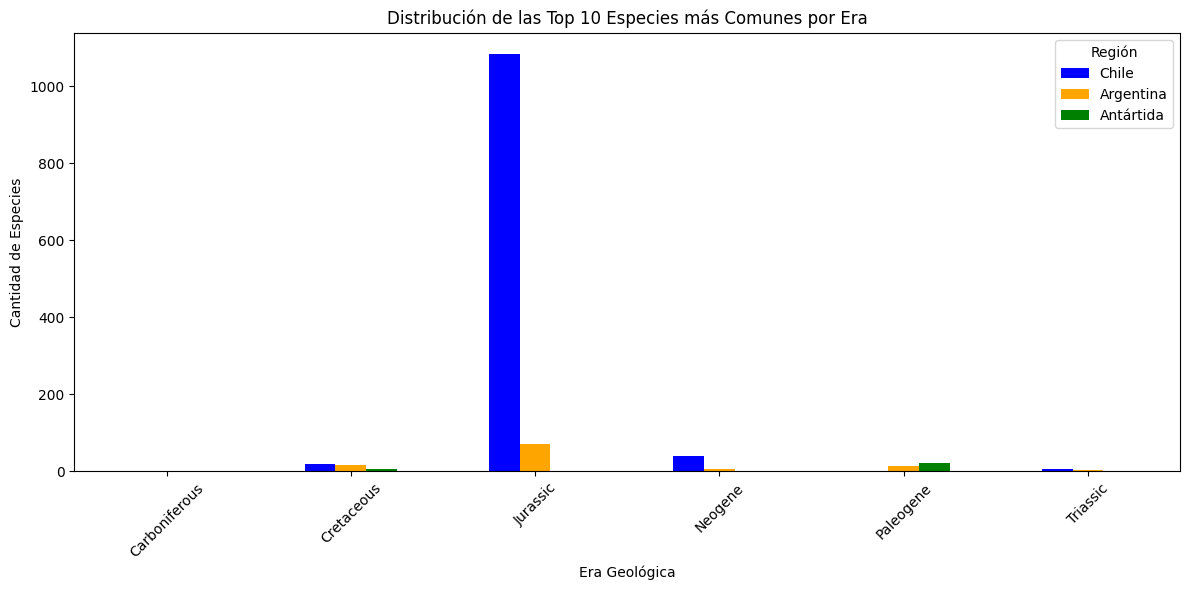

In [16]:

# Agrupar las top 10 especies por era en cada región
era_chile = chile_df[chile_df['accepted_name'].isin(top_10_especies_chile.index)].groupby('era_early')['accepted_name'].count()
era_argentina = argentina_df[argentina_df['accepted_name'].isin(top_10_especies_chile.index)].groupby('era_early')['accepted_name'].count()
era_antartica = antartica_df[antartica_df['accepted_name'].isin(top_10_especies_chile.index)].groupby('era_early')['accepted_name'].count()

# Crear un DataFrame para la comparación
df_era = pd.DataFrame({
    'Chile': era_chile,
    'Argentina': era_argentina,
    'Antártida': era_antartica
}).fillna(0)

# Graficar comparación por eras
plt.figure(figsize=(12, 6))
df_era.plot(kind='bar', figsize=(12, 6), color=['blue', 'orange', 'green'])
plt.title('Distribución de las Top 10 Especies más Comunes por Era')
plt.xlabel('Era Geológica')
plt.ylabel('Cantidad de Especies')
plt.legend(title='Región')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
